Connie Zhou <br>
Math Modelling

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
def deriv(y, t, N, alpha, beta):
    S, I, R = y
    dSdt = -alpha * S * I / N
    dIdt = alpha * S * I / N - beta * I
    dRdt = beta * I
    return dSdt, dIdt, dRdt

In [12]:
#n=popultion
N = 1000
# initial number of infected and recovered
I0, R0 = 5, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
#alpha and beta are contact rate and recovery rate
alpha, beta = 0.2, 0.1
#number of days
T = 300
dt = 1
t = np.linspace(0, T, np.int(T/dt))

In [13]:
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, alpha, beta))
S, I, R = ret.T

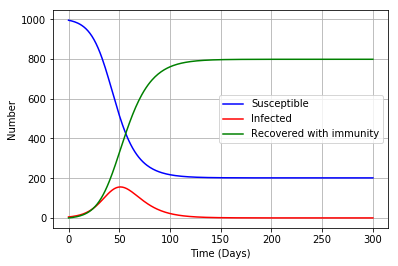

In [40]:
#plot SIR model
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, S, 'b', label='Susceptible')
ax.plot(t, I, 'r', label='Infected')
ax.plot(t, R, 'g', label='Recovered with immunity')
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Number')


ax.grid()
legend = ax.legend()


plt.show()

Sd = S
Id = I
Rd = R

In [48]:
def onestep(N,S,I,R,alpha,beta,dt):
    for i in range(S):
        a = np.random.random_sample()
        if a <(alpha/N)*I*dt:
            S-=1
            I+=1


        
        
    for i in range(I):
        a = np.random.random_sample()
        if a < beta*dt:
            I-=1


    R=N-S-I
    return S,I,R


In [50]:
S2 = S
I2 = I
R2 = R
S = S0
I = I0
R = N-S-I
X = [[S0, I0,R0]]
for i in range(np.shape(t)[0]):
    S,I,R = onestep(N,S,I,R,alpha,beta,dt)
    X = X+ [ [S,I,R]  ]
    
X = np.asarray(X)
S = np.asarray([X[i][0] for i in range(np.shape(t)[0])])
I = np.asarray([X[i][1] for i in range(np.shape(t)[0])])
R = np.asarray([X[i][2] for i in range(np.shape(t)[0])])

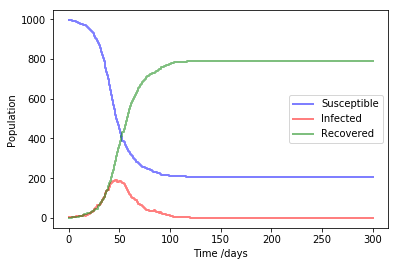

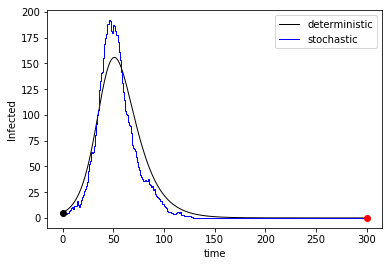

In [65]:
#plot Stochastic SIR model

fig = plt.figure(facecolor='w')
#ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
plt.step(t, S, 'b',  alpha=0.5, lw=2, label='Susceptible')
plt.step(t, I, 'r',  alpha=0.5, lw=2, label='Infected')
plt.step(t, R, 'g',  alpha=0.5, lw=2, label='Recovered')
plt.xlabel('Time /days')
plt.ylabel('Population')
plt.legend()
plt.show()

plt.plot(t,Id,'k',lw=1,label='deterministic')
plt.step(t,I,'b',lw=1,label = 'stochastic')
#plt.step(x2,y2,'r',label = 'trajectory 2')
plt.xlabel('time')
plt.ylabel('Infected')
plt.plot(t[0],I0,'ko')
plt.plot(t[-1],I[-1],'ro')
plt.legend()
plt.show()

Our stochasitc model is very close to our deterministic solution. As seen in the figures, our stochastic model has bits of randomness, in the above simulation, the number of infections happened to be greater than our deterministic model. The peak of infections occurs around the same time where the amount of susceptible and recovered individuals cross. 


I think kinetic equation arguments are relevent in estimating the probabilities of infection. If we consider the process of infection as a reaction then it does affect the probability of reaction. The probability of the end per try is affected by the total population which is why we divide by N.